<a href="https://colab.research.google.com/github/ivanbarrioherreros/PontiaClaClu/blob/main/Clasificacion_y_Clusterizacion_PONTIA_TECH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Curso introductorio al Data Science de PONTIA.TECH**

Llevaremos a cabo un ejercicio de clasificación y otro de clusterización sobre el mismo dataset.

Es un primer acercamiento a la ciencia de datos que nos permitirá asentar los conocimientos adquiridos hasta ahora, comprobar de primera mano que esto del 'Machine Learning' funciona, y reflexionar sobre cómo podría aplicarlo en nuestra empresa o proyecto.

## **¿Qué datos utilizaremos?**

He dejado un dataset muy conocido en el mundo del data science colgado en GitHub (https://raw.githubusercontent.com/ivanbarrioherreros/PontiaClaClu/main/iris.csv). Contiene 150 observaciones etiquetadas de flor (de los tipos setosa, versicolor y virginica). Aplicaremos sobre él técnicas de clasificación y de clusterización, utilizando para ello las mediciones de varias partes de la flor, y mediremos los resultados.

## **Insertamos las librerías necesarias**
Es necesario hacerlo antes de utilizarlas para que el script, a medida que se ejecuta, conozca las diferentes funciones que puede ejecutar

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## **Ingestamos el dataset a través de nuestro enlace a GitHub**
Mediante Pandas, una librería de gestión de dataframes, leerá directamente de la URL que le indiquemos, en este caso la que contiene los datos sobre las flores

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ivanbarrioherreros/PontiaClaClu/main/iris.csv')

## **Exploramos el dataframe**
Lo primero es realizar un análisis exploratorio (EDA) en busca de datos faltantes, que nos permita conocer las columnas de las que disponemos, correlación entre todas ellas, balanceo de clases...

Comenzamos por ver el aspecto que tiene el dataframe:

In [4]:
df

,sepaloLargo,sepaloAncho,petaloLargo,petaloAncho,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## **Describimos estadísticamente el dataframe**

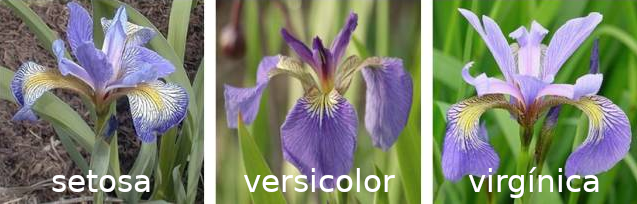

Cuando las medidas son demasiado dispares, se hacen necesarias técnicas de normalización y estandarización

In [5]:
df.describe()

,sepaloLargo,sepaloAncho,petaloLargo,petaloAncho
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **Comprobamos que no exista ningún dato faltante**

En caso opuesto, necesitaríamos utilizar alguna técnica de imputación de faltantes para no perder masa para el entrenamiento

In [6]:
df.isnull().sum(axis=0)

sepaloLargo    0
sepaloAncho    0
petaloLargo    0
petaloAncho    0
clase          0
dtype: int64

## **Dibujamos las cantidades de cada tipo de flor**
Así comprobamos el balanceo del dataframe. En casos de clasificación, cuando tengamos un dataset muy desbalanceado, puede ser necesario aplicar técnicas que aumenten el volumen de las clases más desfavorecidas.

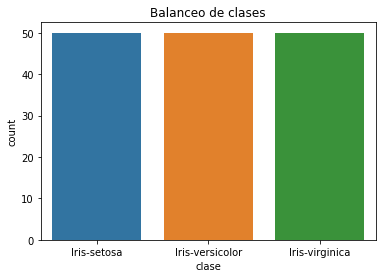

In [7]:
plt.title('Balanceo de clases')
sns.countplot(df['clase'])

## **Comparamos el ancho del sépalo y del pétalo de cada flor, para comprobar si a priori existe relación**

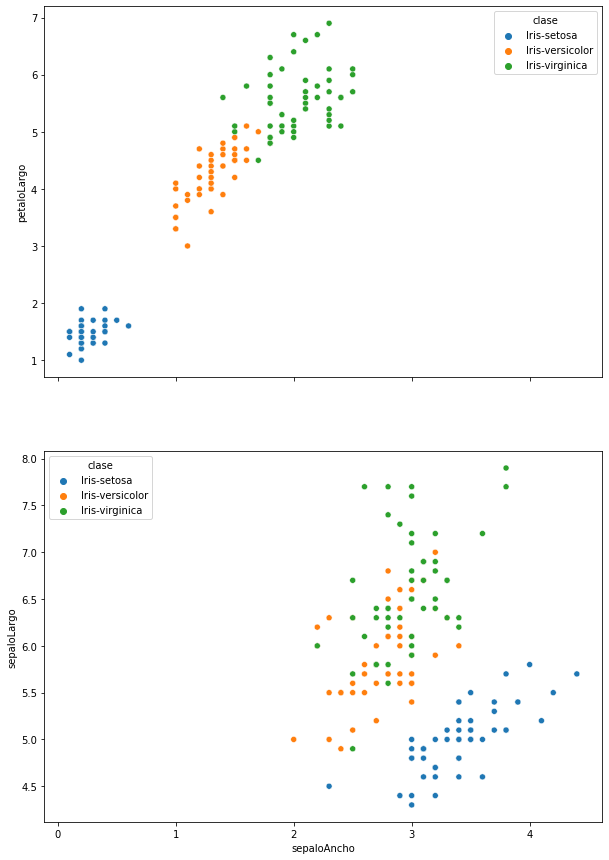

In [8]:
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.50, .50)},
                     figsize=(10, 15))

sns.scatterplot(df['petaloAncho'], 
                df['petaloLargo'],
                hue = df['clase'], ax=ax[0])

sns.scatterplot(df['sepaloAncho'], 
                df['sepaloLargo'],
                hue = df['clase'], ax=ax[1])

## **Probamos un algoritmo de clasificación**
Para entrenar un modelo de clasificación, debemos separar una parte del dataframe en Train y Test. Es decir, con una parte del dataframe entrenamos el modelo y con la otra comprobamos cómo de eficiente es.

In [9]:
train, test = train_test_split(df, test_size = 0.30)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  105
Ejemplos usados para test:  45


## **Entrenamos un modelo de clasificación**

In [10]:
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(train.drop(['clase'], axis=1), 
        train['clase'])

KNeighborsClassifier(n_neighbors=8)

## **Realizamos una predicción sobre los datos de 'test' y colocamos el resultado en un dataframe, junto con la observación 'real'**

In [11]:
prediccionKnn = knn.predict(test.drop(['clase'], axis=1))

comparacion = pd.concat([test['clase'].reset_index(),
                         pd.Series(prediccionKnn).reset_index(drop=True)], 
                         axis=1).set_index('index')

comparacion

,clase,0
index,,
34,Iris-setosa,Iris-setosa
82,Iris-versicolor,Iris-versicolor
145,Iris-virginica,Iris-virginica
55,Iris-versicolor,Iris-versicolor
77,Iris-versicolor,Iris-versicolor
26,Iris-setosa,Iris-setosa
127,Iris-virginica,Iris-versicolor
141,Iris-virginica,Iris-virginica
106,Iris-virginica,Iris-versicolor


## **Obtenemos los registros en los que nuestro modelo ha fallado, y los añadimos a una nueva columna**

In [12]:
comparacion['error'] = np.where((comparacion['clase'] != comparacion[0]), 1, 0)

comparacion['error'][comparacion['error'] == 1]

index
127    1
106    1
126    1
119    1
133    1
121    1
Name: error, dtype: int64

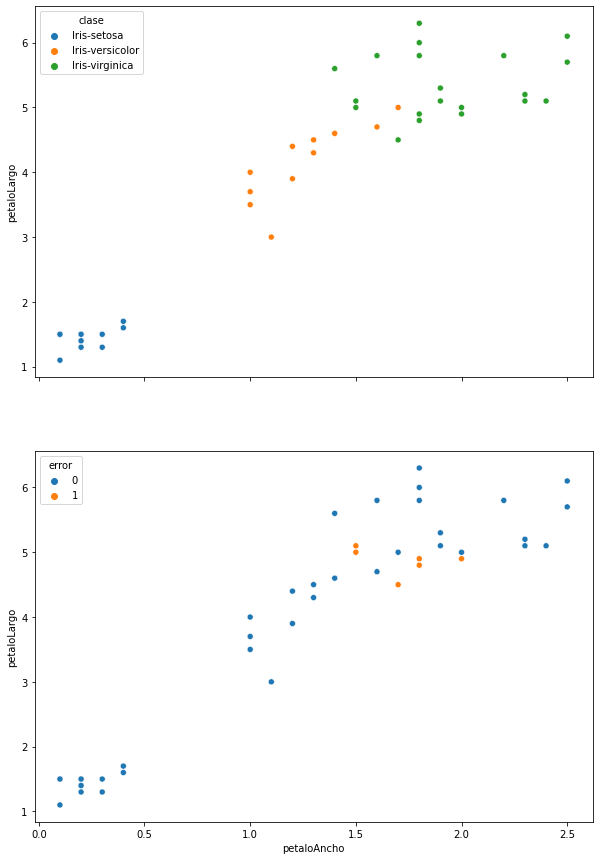

In [13]:
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.50, .50)},
                     figsize=(10, 15))

sns.scatterplot(test['petaloAncho'], 
                test['petaloLargo'],
                hue = test['clase'], ax=ax[0])

sns.scatterplot(test['petaloAncho'], 
                test['petaloLargo'],
                hue = comparacion['error'], ax=ax[1]) # clase

## **Obtenemos una métrica de accuracy**

In [21]:
comparacion['error'].value_counts()[1] *100 / (comparacion['error'].value_counts()[0] + comparacion['error'].value_counts()[1])

13.333333333333334

## **Finalizada la clasificación, probamos un modelo de clusterizado sobre el mismo dataframe**

Para ello, debemos retirar la columna 'clase' y dejar que sea el propio modelo estadístico el que busque diferencias importantes entre las flores observadas.

Retenemos, eso sí, las clases originales para después compararlo con nuestra predicción.

In [22]:
df

,sepaloLargo,sepaloAncho,petaloLargo,petaloAncho,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
retenemos = df['clase']

df = df.drop(['clase'], axis = 1)
df

,sepaloLargo,sepaloAncho,petaloLargo,petaloAncho
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## **Decidimos el número de clústeres óptimo**

Gracias al método Elbow podemos decidir el número de clústeres óptimo, probando entre 1 y 10. 

¿Tuvo sentido la clasificación botánica original? ¿Podemos extrapolar esta duda, por ejemplo, al marketing?

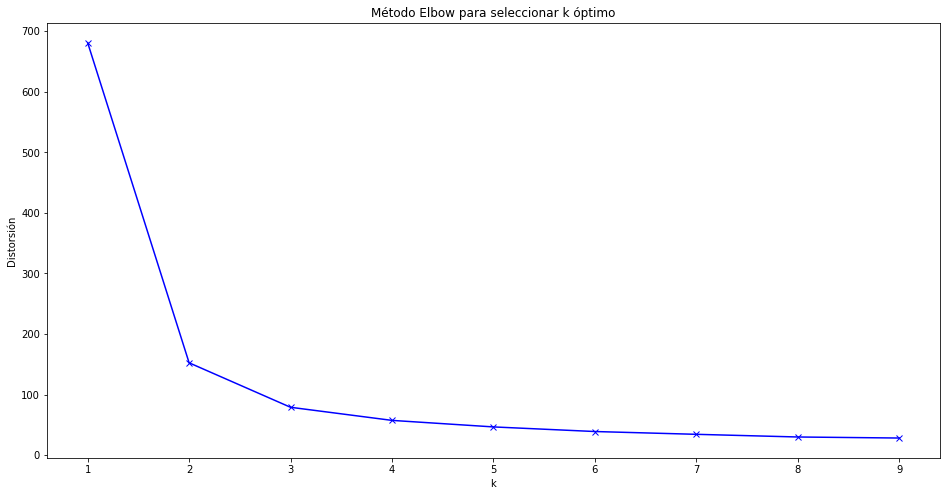

In [24]:
distorsion = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distorsion.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distorsion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('Método Elbow para seleccionar k óptimo')
plt.show()

## **Tomamos la decisión de clusterizar en tres categorías distintas**

Desgraciadamente, el modelo desconoce la nomenclatura 'setosa', 'versicolor'... por lo que en su lugar el modelo predecirá 0, 1 y 2 según cada categoría

In [25]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)

df['kmeans'] = kmeanModel.predict(df)
df

,sepaloLargo,sepaloAncho,petaloLargo,petaloAncho,kmeans
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


## **KMeans sabe que las flores son diferentes, pero no sabe cual es el nombre de cada tipo... por lo que en el siguiente chunk 'traducimos' el número de clúster a su equivalente**

In [36]:
df["kmeansNombre"] = df["kmeans"].apply(lambda x: 'Iris-setosa' 
                                        if x == 1 else ('Iris-virginica' 
                                                        if x == 0 else 'Iris-versicolor')) # 0-2

In [37]:
comparacionKmeans = pd.concat([df['kmeansNombre'].reset_index(),
                         retenemos.reset_index(drop=True)], 
                         axis=1).set_index('index')

comparacionKmeans

,kmeansNombre,clase
index,,
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
...,...,...
145,Iris-virginica,Iris-virginica
146,Iris-versicolor,Iris-virginica
147,Iris-virginica,Iris-virginica


In [38]:
comparacionKmeans['error'] = np.where((comparacionKmeans['clase'] != comparacionKmeans['kmeansNombre']), 1, 0)

comparacionKmeans['error'][comparacionKmeans['error'] == 1]

index
52     1
77     1
101    1
106    1
113    1
114    1
119    1
121    1
123    1
126    1
127    1
133    1
138    1
142    1
146    1
149    1
Name: error, dtype: int64

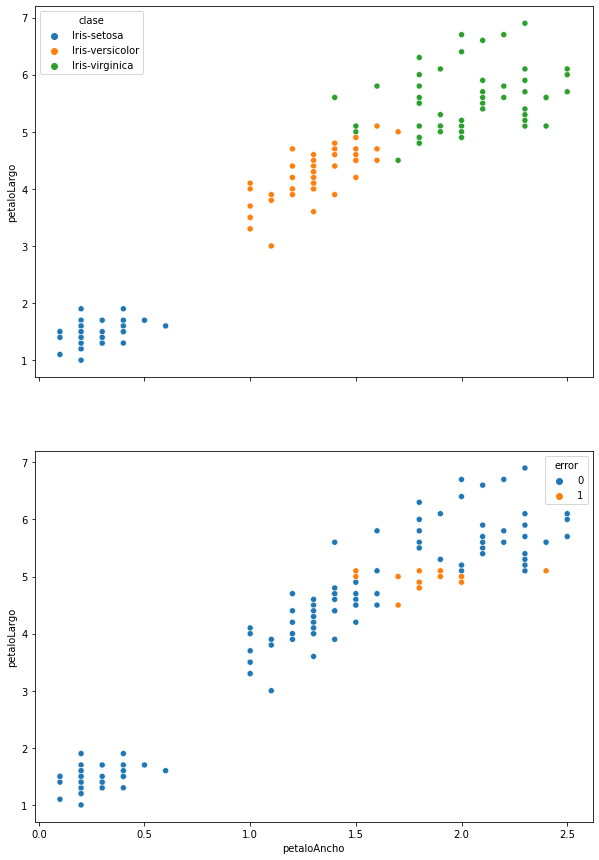

In [39]:
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.50, .50)},
                     figsize=(10, 15))

sns.scatterplot(df['petaloAncho'], 
                df['petaloLargo'],
                hue = retenemos, ax=ax[0])

sns.scatterplot(df['petaloAncho'], 
                df['petaloLargo'],
                hue = comparacionKmeans['error'], ax=ax[1])